## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  71.779619   612.340862  0.508268   4.206042  1.466692
1  26.157071   782.956521  0.072244  10.040491  1.182977
2  15.808712   660.799291  0.437745   4.369396  1.540775
3  17.407658  1718.068302  0.945291   8.012793  1.515074
4  77.514997  1237.265002  0.846232   2.303841  1.617359


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.8973151	total: 54.5ms	remaining: 54.5s
1:	learn: 0.8890850	total: 57.3ms	remaining: 28.6s
2:	learn: 0.8824459	total: 58.4ms	remaining: 19.4s
3:	learn: 0.8730871	total: 60.1ms	remaining: 15s
4:	learn: 0.8656473	total: 61.7ms	remaining: 12.3s
5:	learn: 0.8582485	total: 62.9ms	remaining: 10.4s
6:	learn: 0.8477865	total: 63.7ms	remaining: 9.03s
7:	learn: 0.8400716	total: 64.2ms	remaining: 7.96s
8:	learn: 0.8328734	total: 66.2ms	remaining: 7.29s
9:	learn: 0.8264387	total: 67.1ms	remaining: 6.64s
10:	learn: 0.8196505	total: 67.6ms	remaining: 6.08s
11:	learn: 0.8121357	total: 68.7ms	remaining: 5.66s
12:	learn: 0.8050954	total: 69.7ms	remaining: 5.29s
13:	learn: 0.8000561	total: 70.6ms	remaining: 4.97s
14:	learn: 0.7922971	total: 71.9ms	remaining: 4.72s
15:	learn: 0.7860724	total: 73.1ms	remaining: 4.5s
16:	learn: 0.7770681	total: 73.8ms	remaining: 4.27s
17:	learn: 0.7703282	total: 74.5ms	remaining: 4.06s
18:	learn: 0.7646182	total: 75.2ms	remaining: 3

142:	learn: 0.3379736	total: 161ms	remaining: 962ms
143:	learn: 0.3361890	total: 162ms	remaining: 961ms
144:	learn: 0.3347226	total: 163ms	remaining: 958ms
145:	learn: 0.3330198	total: 163ms	remaining: 954ms
146:	learn: 0.3310742	total: 164ms	remaining: 950ms
147:	learn: 0.3292180	total: 164ms	remaining: 946ms
148:	learn: 0.3271148	total: 165ms	remaining: 943ms
149:	learn: 0.3253894	total: 165ms	remaining: 938ms
150:	learn: 0.3233727	total: 166ms	remaining: 933ms
151:	learn: 0.3212151	total: 167ms	remaining: 929ms
152:	learn: 0.3191434	total: 167ms	remaining: 926ms
153:	learn: 0.3180687	total: 168ms	remaining: 922ms
154:	learn: 0.3168002	total: 169ms	remaining: 921ms
155:	learn: 0.3157559	total: 170ms	remaining: 920ms
156:	learn: 0.3146504	total: 171ms	remaining: 917ms
157:	learn: 0.3134007	total: 172ms	remaining: 919ms
158:	learn: 0.3125636	total: 173ms	remaining: 915ms
159:	learn: 0.3111196	total: 174ms	remaining: 914ms
160:	learn: 0.3096452	total: 175ms	remaining: 913ms
161:	learn: 

311:	learn: 0.1816836	total: 297ms	remaining: 655ms
312:	learn: 0.1812098	total: 298ms	remaining: 653ms
313:	learn: 0.1809408	total: 299ms	remaining: 653ms
314:	learn: 0.1807649	total: 299ms	remaining: 650ms
315:	learn: 0.1803030	total: 300ms	remaining: 648ms
316:	learn: 0.1793441	total: 300ms	remaining: 646ms
317:	learn: 0.1791723	total: 301ms	remaining: 645ms
318:	learn: 0.1790026	total: 301ms	remaining: 643ms
319:	learn: 0.1786260	total: 301ms	remaining: 641ms
320:	learn: 0.1782557	total: 302ms	remaining: 640ms
321:	learn: 0.1769895	total: 306ms	remaining: 644ms
322:	learn: 0.1757403	total: 307ms	remaining: 643ms
323:	learn: 0.1750047	total: 307ms	remaining: 640ms
324:	learn: 0.1748430	total: 308ms	remaining: 639ms
325:	learn: 0.1746526	total: 308ms	remaining: 638ms
326:	learn: 0.1738491	total: 309ms	remaining: 636ms
327:	learn: 0.1736914	total: 310ms	remaining: 634ms
328:	learn: 0.1733466	total: 310ms	remaining: 632ms
329:	learn: 0.1730098	total: 311ms	remaining: 631ms
330:	learn: 

535:	learn: 0.0807518	total: 455ms	remaining: 394ms
536:	learn: 0.0804468	total: 456ms	remaining: 393ms
537:	learn: 0.0801717	total: 457ms	remaining: 392ms
538:	learn: 0.0797701	total: 458ms	remaining: 392ms
539:	learn: 0.0793772	total: 459ms	remaining: 391ms
540:	learn: 0.0790830	total: 460ms	remaining: 390ms
541:	learn: 0.0790334	total: 460ms	remaining: 389ms
542:	learn: 0.0787881	total: 461ms	remaining: 388ms
543:	learn: 0.0787394	total: 462ms	remaining: 387ms
544:	learn: 0.0786914	total: 462ms	remaining: 386ms
545:	learn: 0.0783116	total: 463ms	remaining: 385ms
546:	learn: 0.0779518	total: 464ms	remaining: 384ms
547:	learn: 0.0778975	total: 464ms	remaining: 383ms
548:	learn: 0.0776335	total: 465ms	remaining: 382ms
549:	learn: 0.0771755	total: 465ms	remaining: 381ms
550:	learn: 0.0767996	total: 466ms	remaining: 380ms
551:	learn: 0.0765224	total: 467ms	remaining: 379ms
552:	learn: 0.0762865	total: 467ms	remaining: 378ms
553:	learn: 0.0760542	total: 468ms	remaining: 377ms
554:	learn: 

761:	learn: 0.0408713	total: 613ms	remaining: 192ms
762:	learn: 0.0406750	total: 616ms	remaining: 191ms
763:	learn: 0.0404980	total: 616ms	remaining: 190ms
764:	learn: 0.0404167	total: 618ms	remaining: 190ms
765:	learn: 0.0402254	total: 619ms	remaining: 189ms
766:	learn: 0.0401451	total: 620ms	remaining: 188ms
767:	learn: 0.0400664	total: 620ms	remaining: 187ms
768:	learn: 0.0399142	total: 621ms	remaining: 187ms
769:	learn: 0.0398367	total: 621ms	remaining: 186ms
770:	learn: 0.0397602	total: 622ms	remaining: 185ms
771:	learn: 0.0396842	total: 622ms	remaining: 184ms
772:	learn: 0.0396095	total: 623ms	remaining: 183ms
773:	learn: 0.0395348	total: 624ms	remaining: 182ms
774:	learn: 0.0394086	total: 624ms	remaining: 181ms
775:	learn: 0.0393349	total: 625ms	remaining: 180ms
776:	learn: 0.0392525	total: 626ms	remaining: 180ms
777:	learn: 0.0390633	total: 626ms	remaining: 179ms
778:	learn: 0.0389107	total: 627ms	remaining: 178ms
779:	learn: 0.0387705	total: 630ms	remaining: 178ms
780:	learn: 

897:	learn: 0.0270591	total: 749ms	remaining: 85.1ms
898:	learn: 0.0269621	total: 751ms	remaining: 84.3ms
899:	learn: 0.0268832	total: 751ms	remaining: 83.5ms
900:	learn: 0.0268018	total: 752ms	remaining: 82.6ms
901:	learn: 0.0267234	total: 752ms	remaining: 81.8ms
902:	learn: 0.0266028	total: 753ms	remaining: 80.9ms
903:	learn: 0.0265262	total: 753ms	remaining: 80ms
904:	learn: 0.0264348	total: 754ms	remaining: 79.2ms
905:	learn: 0.0263222	total: 755ms	remaining: 78.3ms
906:	learn: 0.0262120	total: 755ms	remaining: 77.5ms
907:	learn: 0.0261195	total: 756ms	remaining: 76.6ms
908:	learn: 0.0260094	total: 757ms	remaining: 75.8ms
909:	learn: 0.0259325	total: 757ms	remaining: 74.9ms
910:	learn: 0.0258619	total: 758ms	remaining: 74.1ms
911:	learn: 0.0257477	total: 759ms	remaining: 73.2ms
912:	learn: 0.0256824	total: 759ms	remaining: 72.3ms
913:	learn: 0.0256087	total: 760ms	remaining: 71.5ms
914:	learn: 0.0255364	total: 760ms	remaining: 70.6ms
915:	learn: 0.0254642	total: 761ms	remaining: 69

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.5325252977262319


ABC Pre-generator MAE 0.5362340164190067


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

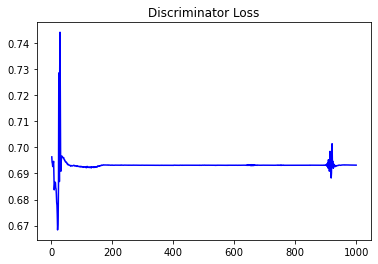

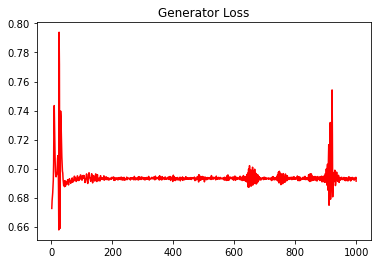

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.5310666545201093


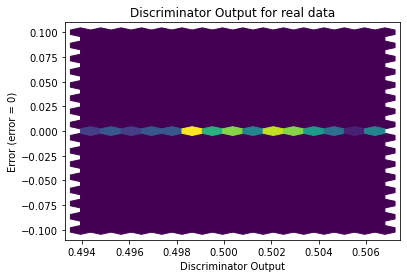

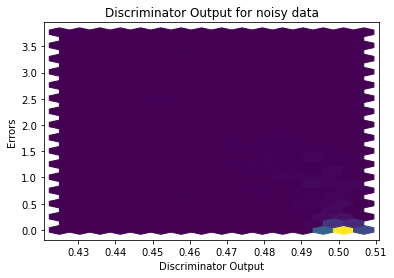

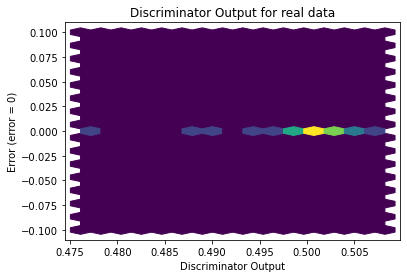

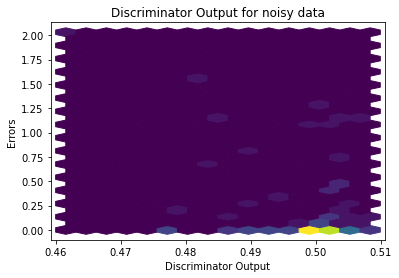

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

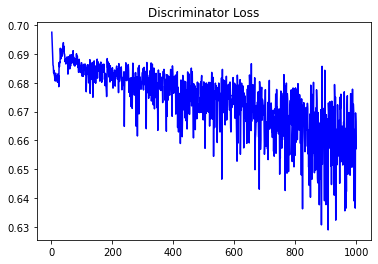

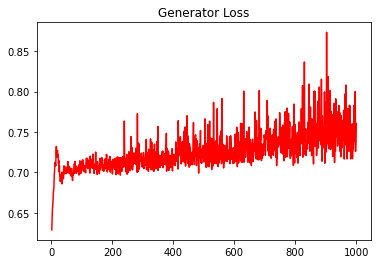

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.6299022348597646


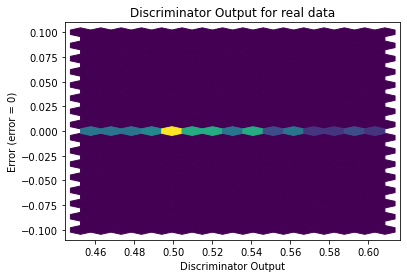

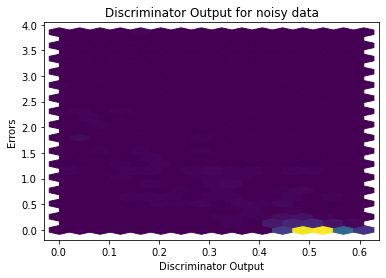

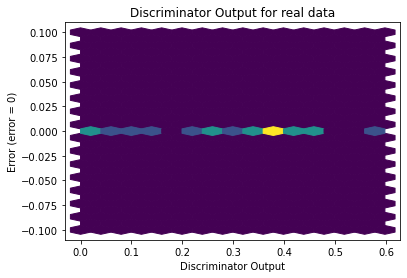

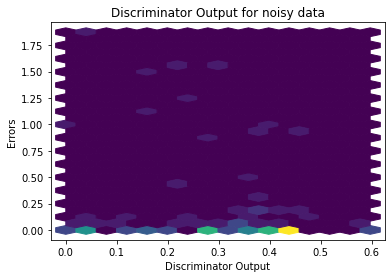

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


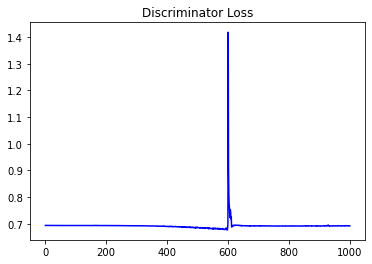

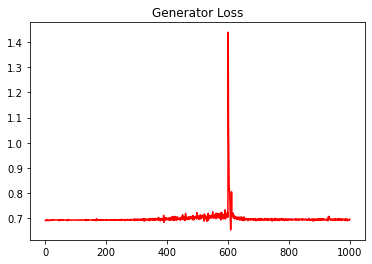

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.5293995512966067


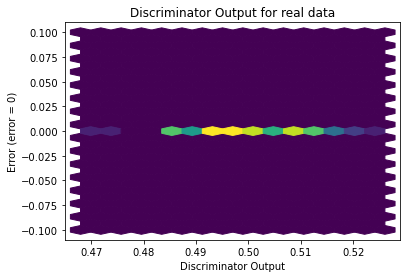

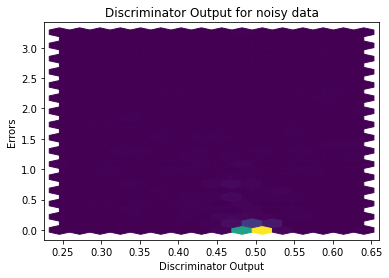

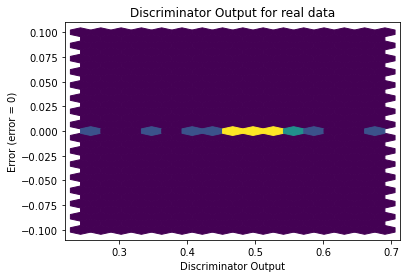

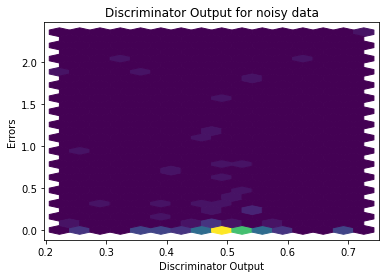

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


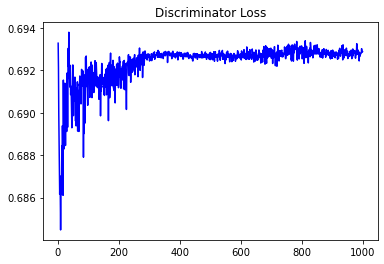

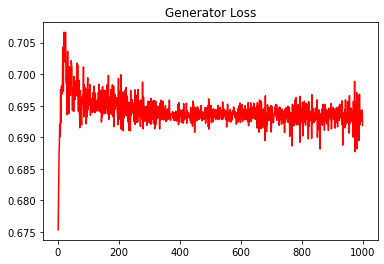

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.5341984753198922


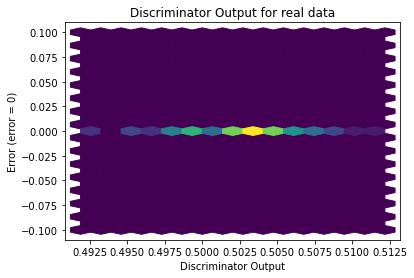

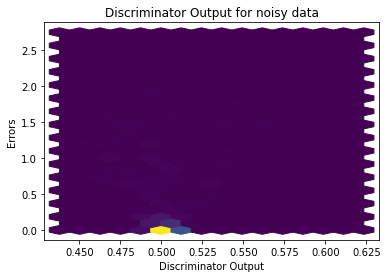

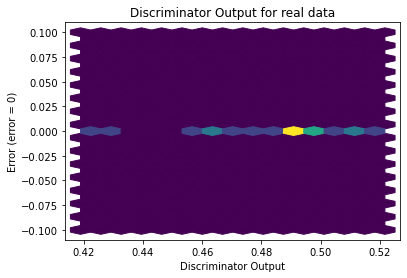

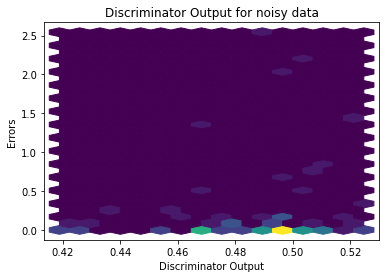

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0078]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0477]], requires_grad=True)
